In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display # This import is needed to use display() with a figure
                                         # Useful when using multiple notebook cells to tweak a plot design.
    
import math

In [2]:
stops_df = pd.read_csv('../data/ShortStay.csv', parse_dates=['InRoomTS', 'OutRoomTS'])

In [3]:
stops_df

,PatID,InRoomTS,OutRoomTS,PatType
0,1,1996-01-01 07:44:00,1996-01-01 08:50:00,IVT
1,2,1996-01-01 08:28:00,1996-01-01 09:20:00,IVT
2,3,1996-01-01 11:44:00,1996-01-01 13:30:00,MYE
3,4,1996-01-01 11:51:00,1996-01-01 12:55:00,CAT
4,5,1996-01-01 12:10:00,1996-01-01 13:00:00,IVT
...,...,...,...,...
59872,59873,1996-09-30 19:31:00,1996-09-30 20:15:00,IVT
59873,59874,1996-09-30 20:23:00,1996-09-30 21:30:00,IVT
59874,59875,1996-09-30 21:00:00,1996-09-30 22:45:00,CAT
59875,59876,1996-09-30 21:57:00,1996-09-30 22:40:00,IVT


In [4]:
stops_df['los'] = stops_df['OutRoomTS'] - stops_df['InRoomTS']

In [5]:
los_hours = stops_df['los'] / pd.Timedelta(1, "h")

In [8]:
los_hours.describe()

count    59877.000000
mean         1.213662
std          0.627664
min          0.000000
25%          0.816667
50%          1.116667
75%          1.500000
max         10.916667
Name: los, dtype: float64

In [16]:
los_hours.skew()

2.3230573281759668

In [21]:
def num_bins_doane(data):
    n = len(data)
    m3 = data.skew()
    sg1 = math.sqrt(6 * (n - 2)/((n + 1) * (n + 3)))
    
    num_bins = math.ceil(1 + math.log2(len(los_hours)) + math.log2(1 + abs(m3) / sg1))
    
    return num_bins

In [22]:
num_bins = num_bins_doane(los_hours)
print(num_bins)

25


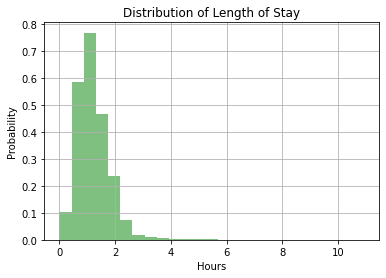

In [25]:
"""
Demo of the histogram (hist) function with a few features.

In addition to the basic histogram, this demo shows a few optional features:

    * Setting the number of data bins
    * The ``normed`` flag, which normalizes bin heights so that the integral of
      the histogram is 1. The resulting histogram is a probability density.
    * Setting the face color of the bars
    * Setting the opacity (alpha value).

"""

# the histogram of the data
# normed=1 plots probs instead of counts, alpha in [0,1] is transparency level (RGBA colors)
plt.hist(los_hours, num_bins, density=1, facecolor='green', alpha=0.5)
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distribution of Length of Stay')
#plt.axis([0, 200, 0, 0.06])
plt.grid(True)
plt.show()


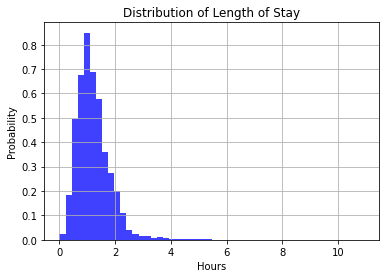

In [26]:
"""
Same as demo above but modified number of bins, color of bars and transparency level

In addition to the basic histogram, this demo shows a few optional features:

    * Setting the number of data bins
    * The ``normed`` flag, which normalizes bin heights so that the integral of
      the histogram is 1. The resulting histogram is a probability density.
    * Setting the face color of the bars
    * Setting the opacity (alpha value).

"""

# the histogram of the data
# normed=1 plots probs instead of counts, alpha in [0,1] is transparency level (RGBA colors)
plt.hist(los_hours, 50, density=1, facecolor='blue', alpha=0.75)
plt.xlabel('Hours')
plt.ylabel('Density')
plt.title('Distribution of Length of Stay')
#plt.axis([0, 200, 0, 0.06])
plt.grid(True)
plt.show()
